In [20]:
%matplotlib notebook

import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td
import torchvision as tv
from PIL import Image
import matplotlib.pyplot as plt
from train_transformer import *

In [21]:
def myimshow(image, ax=plt):
    image = image.to('cpu').detach().numpy()
    image = np.moveaxis(image, [0, 1, 2], [2, 0, 1])
    image = (image + 1) / 2
    image[image < 0] = 0
    image[image > 1] = 1
    h = ax.imshow(image)
    ax.axis('off')
    return h

In [22]:
def load_image(path, size, device):
    img = Image.open(path).convert('RGB')
    transform = tv.transforms.Compose([
            tv.transforms.Resize(size),
            tv.transforms.ToTensor(),
            tv.transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
            ])
    img = transform(img)
    img = img.reshape((1, 3, size[0], size[1]))
    img = img.to(device)
    return img

In [23]:
def stylize(content_path, style_path, transformer_path, size, device):
    content = load_image(content_path, size, device)
    style = load_image(style_path, size, device)
    transformer = torch.load(transformer_path, map_location = device).eval()
    with torch.no_grad():
        output = transformer(content)
    plt.subplot(1, 3, 1)
    myimshow(content[0])
    plt.subplot(1, 3, 2)
    myimshow(output[0])
    plt.subplot(1, 3, 3)
    myimshow(style[0])

In [25]:
image_size = (512, 512)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

<IPython.core.display.Javascript object>


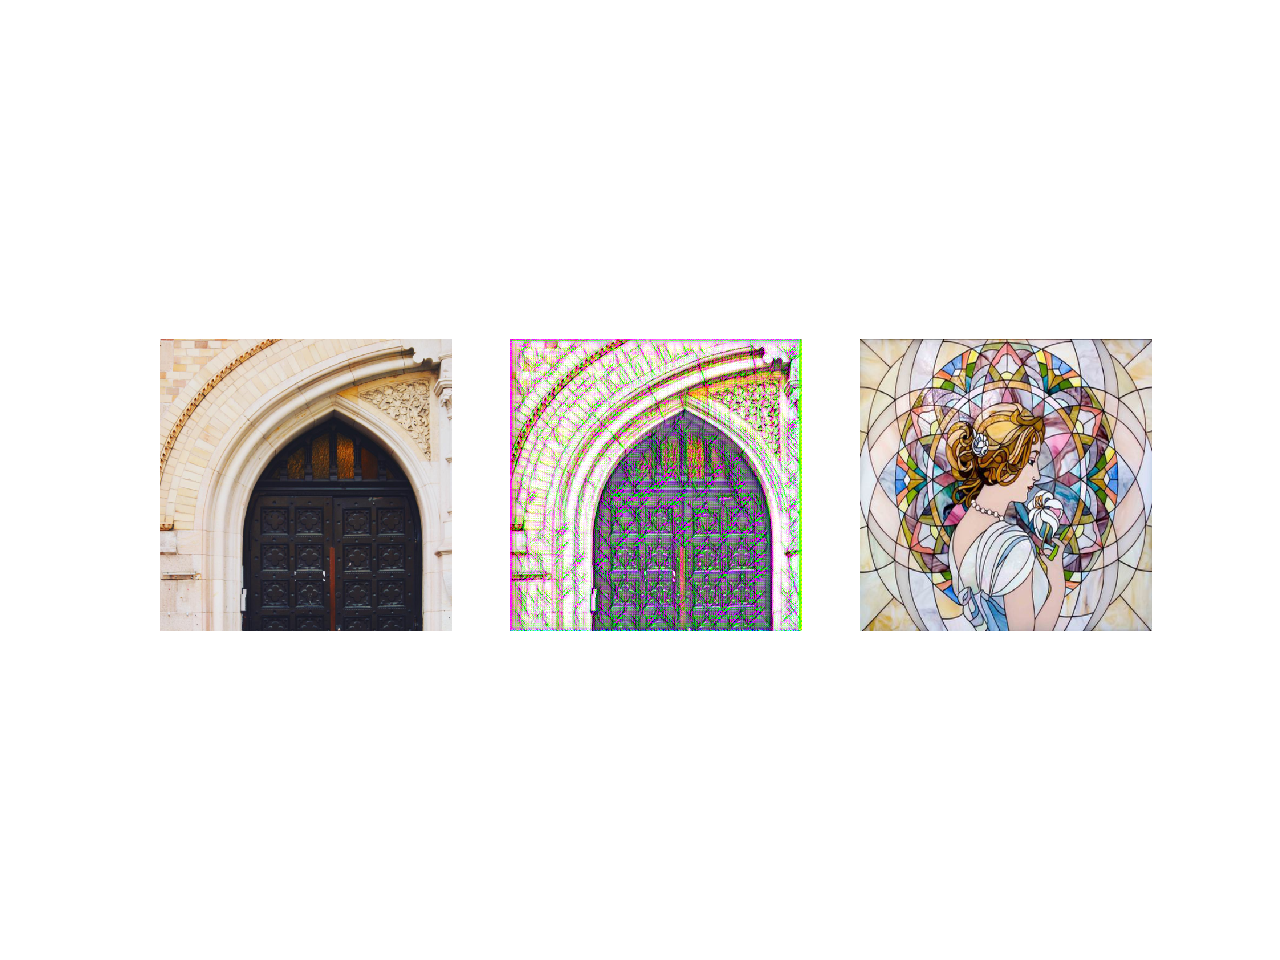

In [26]:
stylize('images/content/amber.jpg', 'images/style/mosaic.jpg', 'models/mosaic', image_size, device)